In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# A. THU THẬP DỮ LIỆU

# B. KHÁM PHÁ DỮ LIỆU

## 1. Đọc dữ liệu và một số thông tin phổ biến

In [2]:
patient_df = pd.read_csv('healthcare_dataset_stroke.csv', index_col='id')

In [3]:
patient_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
n_rows, n_cols = patient_df.shape
print(f"Number of rows: {n_rows}")
print(f"Number of columns: {n_cols}")

Number of rows: 5110
Number of columns: 11


* Dữ liệu có bị lặp

In [5]:
is_duplicate_rows = patient_df.duplicated().any()
is_duplicate_rows

False

## 2. Features Classification: Categorical vs Numerical

In [6]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


* Categorical: gender, hypertension (bệnh tăng huyết áp), heart_disease (bệnh tim), ever_married, work_type, residence_type
* Numerical: Age, avg_glucose_level, bmi
* Blank or null: bmi

### Theo như data dictionary, nếu mà bệnh nhân được đánh dấu là 1, thì anh ấy hay cô ấy bị đột quỵ. Rõ ràng, số 0 hay 1 là một cái cờ hiệu để chúng ta biết người đó có bị đột quỵ hay không. Đúng, kiểu dữ liệu của column 'Stroke' là int64, điều này là nó thuộc loại số. Tuy nhiên, ta có thể thay đổi với những dòng lệnh sau.

In [7]:
patient_df['stroke'] = patient_df['stroke'].astype('category')

In [8]:
patient_df['stroke'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [9]:
patient_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type']

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')

convert_cat(patient_df, features)      

In [11]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   category
 3   heart_disease      5110 non-null   category
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                4909 non-null   float64 
 9   smoking_status     5110 non-null   object  
 10  stroke             5110 non-null   category
dtypes: category(7), float64(3), object(1)
memory usage: 235.5+ KB


### Sự phân tán của những đặc trưng thuộc kiểu Numerical

In [12]:
patient_df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


* Column 'bmi' có chứa giá trị null. Mình sẽ xử lý ở bước EDA
* Nhìn vào các giá trị min, std và max của 3 đặc trưng. Ta thấy có xuất hiện giá trị ngoại lai

### Sự phân tán của những đặc trưng thuộc kiểu Categorical

In [13]:
patient_df.describe(include='category')

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,stroke
count,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,2
top,Female,0,0,Yes,Private,Urban,0
freq,2994,4612,4834,3353,2925,2596,4861


## 3. Khám phá dữ liệu EDA

### 3.1 Correlating categorical features

#### Biến mục tiêu: Stroke

In [55]:
stroke_df = patient_df['stroke'].value_counts().to_frame()

In [56]:
patient_df['stroke'].value_counts(normalize=True).to_frame()

,stroke
0,0.951272
1,0.048728


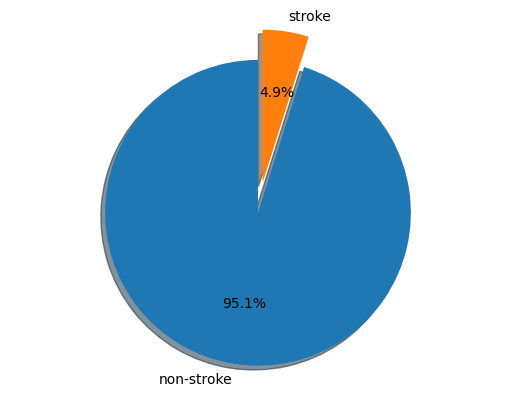

In [82]:
sizes = np.asarray(stroke_df).flatten()
labels = 'non-stroke', 'stroke'
explode = (0, 0.2)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal');


Chỉ có 4.9% người bị mắc bệnh đột quỵ.

#### Gender

In [22]:
patient_df['gender'].value_counts().to_frame()

,gender
Female,2994
Male,2115
Other,1


In [23]:
patient_df.groupby('stroke')['gender'].value_counts().to_frame()

gender
stroke gender        
0      Female    2853
       Male      2007
       Other        1
1      Female     141
       Male       108
       Other        0

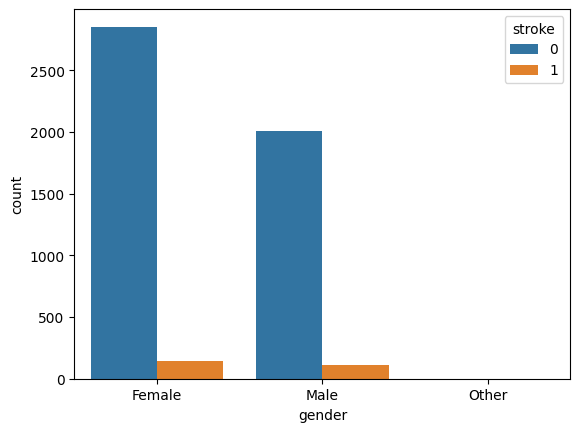

In [20]:
sns.countplot(data=patient_df, x='gender', hue='stroke');

* Ta thấy người giới tính nam bị đột quỵ nhiều hơn giới tính nữ. Nhưng chênh lệch không quá nhiều. 

### Các cột đặc trưng thuộc Category còn lại

In [ ]:
cols = []